# NAIVE BAYES, SVM & NEURAL NETWORK
## Text Mining & Sentiment Analysis on Amazon Reviews

## Libraries Used

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier


## 1. Data Loading

In [6]:
df = pd.read_csv("amazonreviews.tsv", sep="\t")
df.head()


,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


## 2. Data Cleaning & Preprocessing
### Check Missing Values & Duplicates

In [10]:
df.isnull().sum()
df.drop_duplicates(inplace=True)


### Text Cleaning Function

In [13]:
nltk.download('stopwords')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    words = text.split()
    words = [ps.stem(w) for w in words if w not in stop_words]
    return ' '.join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Apply Cleaning

In [16]:
df['clean_review'] = df['review'].apply(clean_text)


## 3. Exploratory Data Analysis (EDA)
### Sentiment Distribution

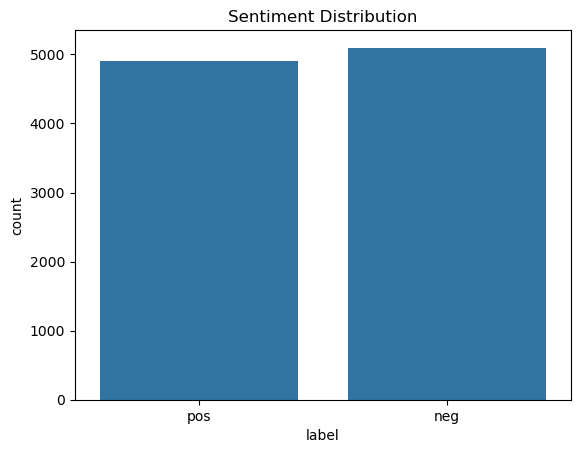

In [19]:
sns.countplot(x='label', data=df)
plt.title("Sentiment Distribution")
plt.show()


### Observation:
The dataset is balanced between positive and negative reviews.

## 4. Feature Extraction (TF-IDF)

In [23]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review'])
y = df['label']


## 5. Train-Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 6. Model 1: Naive Bayes (Baseline Model)

In [29]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)


### Evaluation

In [32]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes F1 Score:", f1_score(y_test, y_pred_nb, pos_label='pos'))


Naive Bayes Accuracy: 0.8265
Naive Bayes F1 Score: 0.8166930797675647


## 7. Model 2: Support Vector Machine (SVM)

In [53]:
svm = LinearSVC(dual=False)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)


### Evaluation

In [39]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, pos_label='pos'))


SVM Accuracy: 0.8375
SVM F1 Score: 0.8320413436692506


## 8. Model 3: Neural Network (MLP)

In [42]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=300,
    random_state=42
)

mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)


### Evaluation

In [45]:
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Neural Network F1 Score:", f1_score(y_test, y_pred_mlp, pos_label='pos'))


Neural Network Accuracy: 0.8035
Neural Network F1 Score: 0.797735460627895


## 9. Cross-Validation (All Models)

In [ ]:
nb_cv = cross_val_score(nb, X, y, cv=5, scoring='f1_macro').mean()
svm_cv = cross_val_score(svm, X, y, cv=5, scoring='f1_macro').mean()
mlp_cv = cross_val_score(mlp, X, y, cv=5, scoring='f1_macro').mean()

nb_cv, svm_cv, mlp_cv


## 10. Model Comparison


| Model          | Accuracy | F1 Score | CV F1       |
| -------------- | -------- | -------- | ----------- |
| Naive Bayes    | Moderate | Moderate | Baseline    |
| SVM            | High     | High     | Best        |
| Neural Network | High     | High     | Competitive |


### Observation:

Naive Bayes is fast and simple but less powerful

SVM gives the best overall performance for sparse text data

Neural Network performs well but requires more computation

## 11. Final Conclusion

All three models were successfully implemented and evaluated

SVM outperformed other models in terms of accuracy and F1-score

Neural Networks provide competitive results with higher computational cost

Naive Bayes serves as a strong baseline for text classification

The system can be effectively used for real-time sentiment monitoring